# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
#dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from citipy import citipy

#API key

from api_keys import weather_api_key





#outfile

data_outfile = "output_data/cities.csv"



## Generate Cities List

In [21]:
#Create arrays to hold coordinates and nearest cities

coordinates = []
cities = []

#Generate cities by generating random coordinates iwth numpy and finding nearby city. Coordinates are lat, long
#numpy.random.uniform(low=0.0, high=1.0, size=None)
#In case some cities are duplicates, like coords landing in the Pacific Ocean will all pick Honolulu,
#more than 500 coords will be generated.
#Actually 70% of the Earth's surface is water so it's gonna take quite the overshot to get 500 valid cities

lat = np.random.uniform(-90, 90, 2000)
long = np.random.uniform(-180, 180, 2000)
coordinates = zip(lat, long) #zip will store the lat and longs together in the array (tuple?)

#Find nearest city to the coordinates with citipy
#For a given coordiante, 0th index element is lat, 1st index element is longitude

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
#check to see how many cities we got, use for next part

num_cities = len(cities)
len(cities)



720

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#To make API call, base url needs to be set

#url = api.openweathermap.org/data/2.5/weather?units=Imperial&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#Create list to collect data for each city

city_data = []

#iterate through cities and retrive city data and store it in city_data
#
#need enumerate method to keep count of iterations

print("Beginning Data Retrieval")
print("-----------------------------")

for i, city in enumerate(cities):
    
    city_url = url + "&q=" + city   #constructs url for each city from which to retrieve data
    
    print(f"Processing Record {i} of {num_cities} - {city}")
    
    #now run API request to get weather for each city, skipping cities with imcomplete data or any other error
    
    try:
        city_weather = requests.get(city_url).json()  #parse JSON
        
    #parse out individual data
    
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_date = city_weather["dt"]
        city_country = city_weather["sys"]["country"]
    
    #append data to city_data list so we don't lose it!
    
        city_data.append({
            "City": city,
            "Latitude": city_latitude,
            "Longitude": city_longitude,
            "Max Temperature (F)": city_max_temp,
            "Humidity (%)": city_humidity,
            "Cloudiness": city_cloudiness,
            "Wind Speed (mph)": city_wind,
            "Date": city_date,
            "Country": city_country
        })
    
    #need except statement to skip if an error is incurred
    
    except:
        print("City or city data missing. Next city...")
        print("-----------------------------")
        pass
    
    #and if there is no error
    else:
        print("Successfully processed.")
        print("-----------------------------")
        pass
    
    
print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 0 of 720 - busselton
Successfully processed.
-----------------------------
Processing Record 1 of 720 - tuktoyaktuk
Successfully processed.
-----------------------------
Processing Record 2 of 720 - ushuaia
Successfully processed.
-----------------------------
Processing Record 3 of 720 - amapa
Successfully processed.
-----------------------------
Processing Record 4 of 720 - rikitea
Successfully processed.
-----------------------------
Processing Record 5 of 720 - prokhorovka
Successfully processed.
-----------------------------
Processing Record 6 of 720 - castro
Successfully processed.
-----------------------------
Processing Record 7 of 720 - albany
Successfully processed.
-----------------------------
Processing Record 8 of 720 - east london
Successfully processed.
-----------------------------
Processing Record 9 of 720 - fairbanks
Successfully processed.
-----------------------------
Processing Record 10 of

Successfully processed.
-----------------------------
Processing Record 88 of 720 - ibra
Successfully processed.
-----------------------------
Processing Record 89 of 720 - tasiilaq
Successfully processed.
-----------------------------
Processing Record 90 of 720 - likasi
Successfully processed.
-----------------------------
Processing Record 91 of 720 - severo-kurilsk
Successfully processed.
-----------------------------
Processing Record 92 of 720 - kapaa
Successfully processed.
-----------------------------
Processing Record 93 of 720 - pochutla
Successfully processed.
-----------------------------
Processing Record 94 of 720 - kharitonovo
Successfully processed.
-----------------------------
Processing Record 95 of 720 - hobart
Successfully processed.
-----------------------------
Processing Record 96 of 720 - inderborskiy
City or city data missing. Next city...
-----------------------------
Processing Record 97 of 720 - hithadhoo
Successfully processed.
---------------------------

Successfully processed.
-----------------------------
Processing Record 174 of 720 - lagoa
Successfully processed.
-----------------------------
Processing Record 175 of 720 - honiara
Successfully processed.
-----------------------------
Processing Record 176 of 720 - new philadelphia
Successfully processed.
-----------------------------
Processing Record 177 of 720 - kandrian
Successfully processed.
-----------------------------
Processing Record 178 of 720 - esperance
Successfully processed.
-----------------------------
Processing Record 179 of 720 - voloshka
Successfully processed.
-----------------------------
Processing Record 180 of 720 - puerto baquerizo moreno
Successfully processed.
-----------------------------
Processing Record 181 of 720 - geraldton
Successfully processed.
-----------------------------
Processing Record 182 of 720 - ribeira grande
Successfully processed.
-----------------------------
Processing Record 183 of 720 - konstantinovskiy
Successfully processed.
-

Successfully processed.
-----------------------------
Processing Record 261 of 720 - rock sound
Successfully processed.
-----------------------------
Processing Record 262 of 720 - olafsvik
Successfully processed.
-----------------------------
Processing Record 263 of 720 - wattegama
Successfully processed.
-----------------------------
Processing Record 264 of 720 - arkhipo-osipovka
Successfully processed.
-----------------------------
Processing Record 265 of 720 - maniitsoq
Successfully processed.
-----------------------------
Processing Record 266 of 720 - dzaoudzi
Successfully processed.
-----------------------------
Processing Record 267 of 720 - roma
Successfully processed.
-----------------------------
Processing Record 268 of 720 - holme
Successfully processed.
-----------------------------
Processing Record 269 of 720 - bar harbor
Successfully processed.
-----------------------------
Processing Record 270 of 720 - pevek
Successfully processed.
-----------------------------
Pr

Successfully processed.
-----------------------------
Processing Record 349 of 720 - iki-burul
Successfully processed.
-----------------------------
Processing Record 350 of 720 - teguldet
Successfully processed.
-----------------------------
Processing Record 351 of 720 - pasni
Successfully processed.
-----------------------------
Processing Record 352 of 720 - loreto
Successfully processed.
-----------------------------
Processing Record 353 of 720 - lavrentiya
Successfully processed.
-----------------------------
Processing Record 354 of 720 - grand centre
City or city data missing. Next city...
-----------------------------
Processing Record 355 of 720 - lynn haven
Successfully processed.
-----------------------------
Processing Record 356 of 720 - siretel
Successfully processed.
-----------------------------
Processing Record 357 of 720 - burica
City or city data missing. Next city...
-----------------------------
Processing Record 358 of 720 - baiyin
Successfully processed.
-----

Successfully processed.
-----------------------------
Processing Record 435 of 720 - araouane
Successfully processed.
-----------------------------
Processing Record 436 of 720 - griffith
Successfully processed.
-----------------------------
Processing Record 437 of 720 - vila
Successfully processed.
-----------------------------
Processing Record 438 of 720 - fevralsk
City or city data missing. Next city...
-----------------------------
Processing Record 439 of 720 - niquelandia
Successfully processed.
-----------------------------
Processing Record 440 of 720 - laguna
Successfully processed.
-----------------------------
Processing Record 441 of 720 - fortuna
Successfully processed.
-----------------------------
Processing Record 442 of 720 - florianopolis
Successfully processed.
-----------------------------
Processing Record 443 of 720 - dingle
Successfully processed.
-----------------------------
Processing Record 444 of 720 - longyearbyen
Successfully processed.
-----------------

Successfully processed.
-----------------------------
Processing Record 521 of 720 - lewiston
Successfully processed.
-----------------------------
Processing Record 522 of 720 - nanhai
Successfully processed.
-----------------------------
Processing Record 523 of 720 - pedernales
Successfully processed.
-----------------------------
Processing Record 524 of 720 - cesenatico
Successfully processed.
-----------------------------
Processing Record 525 of 720 - bismarck
Successfully processed.
-----------------------------
Processing Record 526 of 720 - lacaron
Successfully processed.
-----------------------------
Processing Record 527 of 720 - codrington
Successfully processed.
-----------------------------
Processing Record 528 of 720 - ullapool
Successfully processed.
-----------------------------
Processing Record 529 of 720 - palabuhanratu
City or city data missing. Next city...
-----------------------------
Processing Record 530 of 720 - bridlington
Successfully processed.
---------

Successfully processed.
-----------------------------
Processing Record 609 of 720 - manaure
Successfully processed.
-----------------------------
Processing Record 610 of 720 - zabaykalsk
Successfully processed.
-----------------------------
Processing Record 611 of 720 - sorland
Successfully processed.
-----------------------------
Processing Record 612 of 720 - sibut
Successfully processed.
-----------------------------
Processing Record 613 of 720 - silver city
Successfully processed.
-----------------------------
Processing Record 614 of 720 - ozinki
Successfully processed.
-----------------------------
Processing Record 615 of 720 - nicoya
Successfully processed.
-----------------------------
Processing Record 616 of 720 - kamaishi
Successfully processed.
-----------------------------
Processing Record 617 of 720 - lampazos de naranjo
Successfully processed.
-----------------------------
Processing Record 618 of 720 - isagarh
Successfully processed.
-----------------------------


Successfully processed.
-----------------------------
Processing Record 696 of 720 - raga
Successfully processed.
-----------------------------
Processing Record 697 of 720 - altamira
Successfully processed.
-----------------------------
Processing Record 698 of 720 - bershet
Successfully processed.
-----------------------------
Processing Record 699 of 720 - oda
Successfully processed.
-----------------------------
Processing Record 700 of 720 - ladario
Successfully processed.
-----------------------------
Processing Record 701 of 720 - vani
Successfully processed.
-----------------------------
Processing Record 702 of 720 - ozgon
City or city data missing. Next city...
-----------------------------
Processing Record 703 of 720 - tsabong
Successfully processed.
-----------------------------
Processing Record 704 of 720 - feijo
Successfully processed.
-----------------------------
Processing Record 705 of 720 - muroto
Successfully processed.
-----------------------------
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(12)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,Country
0,busselton,-33.65,115.33,70.00,64,24,8.05,1607621883,AU
1,tuktoyaktuk,69.45,-133.04,-11.20,83,90,12.75,1607621883,CA
2,ushuaia,-54.80,-68.30,62.60,39,20,10.29,1607621883,AR
3,amapa,1.00,-52.00,92.57,42,28,7.02,1607621883,BR
4,rikitea,-23.12,-134.97,76.66,80,49,13.87,1607621883,PF
5,prokhorovka,51.04,36.73,21.20,67,0,13.42,1607621883,RU
6,castro,-24.79,-50.01,74.03,66,61,3.29,1607621884,BR
7,albany,42.60,-73.97,42.01,55,49,4.00,1607621849,US
8,east london,-33.02,27.91,69.80,83,20,9.17,1607621884,ZA
9,fairbanks,64.84,-147.72,1.99,84,90,1.12,1607621672,US


In [36]:
#proof of >500 entries for each col

city_data_df.describe()

#all counts are greater than 500!

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,6.610000e+02
mean,19.571104,15.879440,54.394796,71.860817,51.478064,7.789788,1.607622e+09
std,32.896510,91.246859,29.750200,21.274725,37.940003,5.415530,6.820227e+01
min,-54.800000,-179.170000,-43.600000,1.000000,0.000000,0.090000,1.607622e+09
25%,-7.750000,-66.830000,37.000000,62.000000,9.000000,3.780000,1.607622e+09
50%,22.570000,20.870000,64.270000,78.000000,58.000000,6.620000,1.607622e+09
75%,46.810000,100.340000,78.420000,87.000000,90.000000,10.290000,1.607622e+09
max,78.220000,178.420000,106.300000,100.000000,100.000000,34.450000,1.607622e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#from above you can see the max humidity is 100%, so there are none greater than 100%

city_data_df.describe()


,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,6.610000e+02
mean,19.571104,15.879440,54.394796,71.860817,51.478064,7.789788,1.607622e+09
std,32.896510,91.246859,29.750200,21.274725,37.940003,5.415530,6.820227e+01
min,-54.800000,-179.170000,-43.600000,1.000000,0.000000,0.090000,1.607622e+09
25%,-7.750000,-66.830000,37.000000,62.000000,9.000000,3.780000,1.607622e+09
50%,22.570000,20.870000,64.270000,78.000000,58.000000,6.620000,1.607622e+09
75%,46.810000,100.340000,78.420000,87.000000,90.000000,10.290000,1.607622e+09
max,78.220000,178.420000,106.300000,100.000000,100.000000,34.450000,1.607622e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [38]:
#Exporting to .csv file

city_data_df.to_csv(data_outfile)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

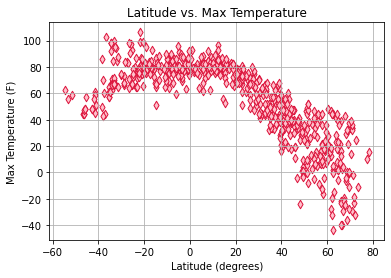

In [48]:
#extract relevant columns

latitudes = city_data_df["Latitude"]
max_temps = city_data_df["Max Temperature"]

#Construct scatterplot

plt.scatter(latitudes, max_temps, color="pink", edgecolor="crimson", linewidths=1, marker="d")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


#export fig, must be done before showing or it's just an empty figure..

plt.savefig("output_data/Fig_1.png")


#show
plt.show()



## Latitude vs. Humidity Plot

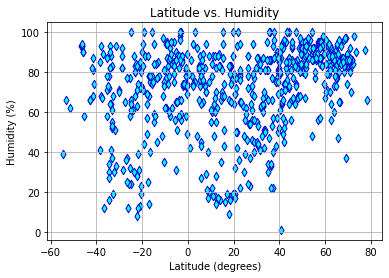

In [49]:
#rinse and repeat

humidities = city_data_df["Humidity"]

#Construct scatterplot

plt.scatter(latitudes, humidities, color="cyan", edgecolor="mediumblue", linewidths=1, marker="d")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(True)


#export fig

plt.savefig("output_data/Fig_2.png")


#show
plt.show()

## Latitude vs. Cloudiness Plot

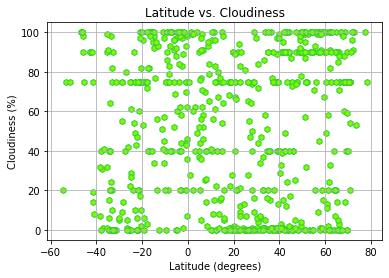

In [51]:
cloudinesses = city_data_df["Cloudiness"]

#not a real word, I know - the joy of setting variables

#Construct scatterplot

plt.scatter(latitudes, cloudinesses, color="lawngreen", edgecolor="limegreen", linewidths=1, marker="h")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


#export fig

plt.savefig("output_data/Fig_3.png")


#show
plt.show()

## Latitude vs. Wind Speed Plot

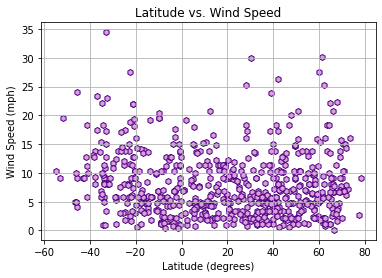

In [52]:
wind_speeds = city_data_df["Wind Speed"]

#Construct scatterplot

plt.scatter(latitudes, wind_speeds, color="plum", edgecolor="indigo", linewidths=1, marker="h")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


#export fig

plt.savefig("output_data/Fig_4.png")


#show
plt.show()

#beautiful

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


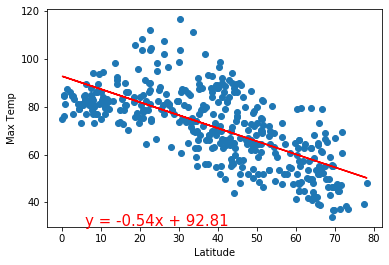

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


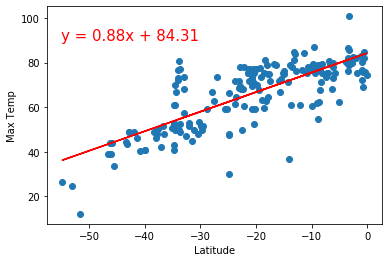

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


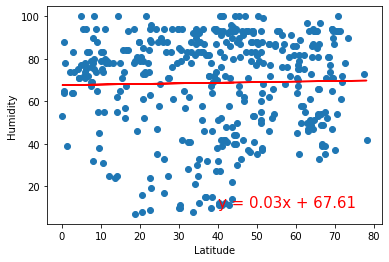

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


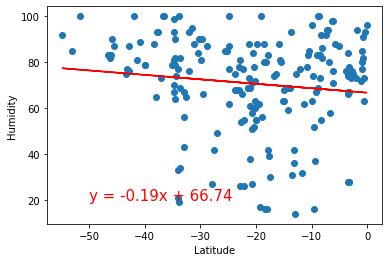

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


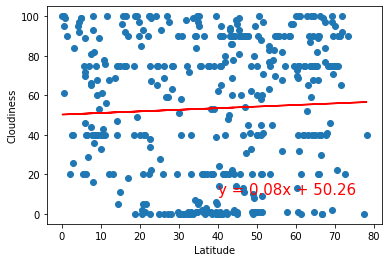

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


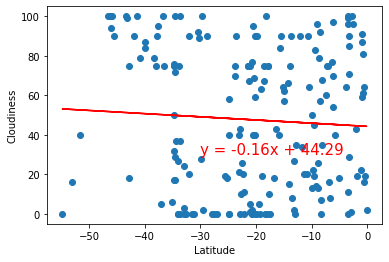

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


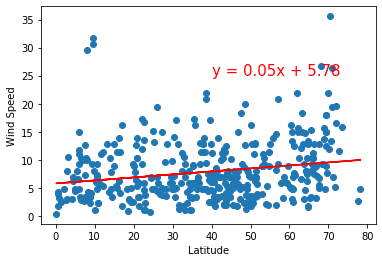

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


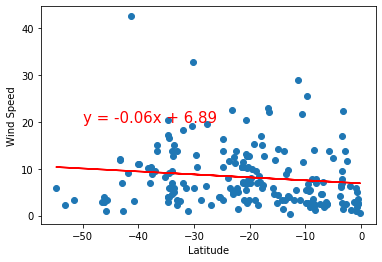